<a href="https://colab.research.google.com/github/HowardHNguyen/ML_DL_Time_Series_by_Python/blob/main/Stock_Prediction_and_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
from pandas_datareader import data
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Specify the stock symbol and date range
symbol = 'AMZN'
start = '2020-01-02'
end = '2023-12-15'

In [4]:
# Fetch stock data from Yahoo Finance
df = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


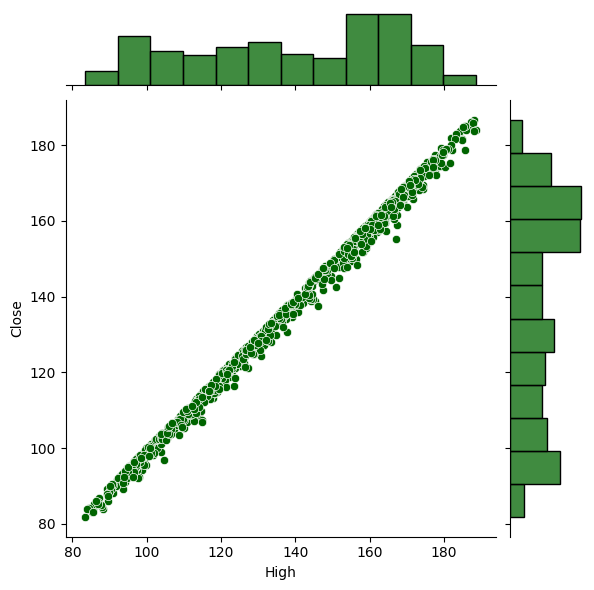

In [5]:
#sns.jointplot('High', 'Close', df, kind = 'scatter', color ='darkblue')
sns.jointplot(x='High', y='Close', data=df, kind='scatter', color='darkgreen')
plt.show()

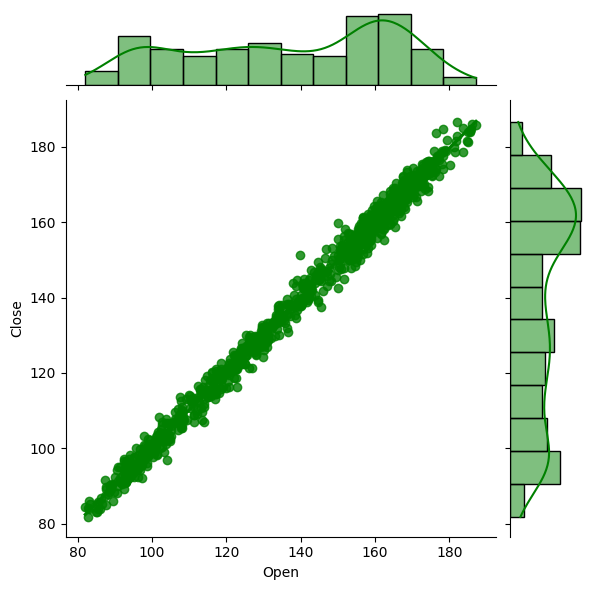

In [6]:
sns.jointplot(x='Open', y='Close', data=df, kind = 'reg', color ='green')

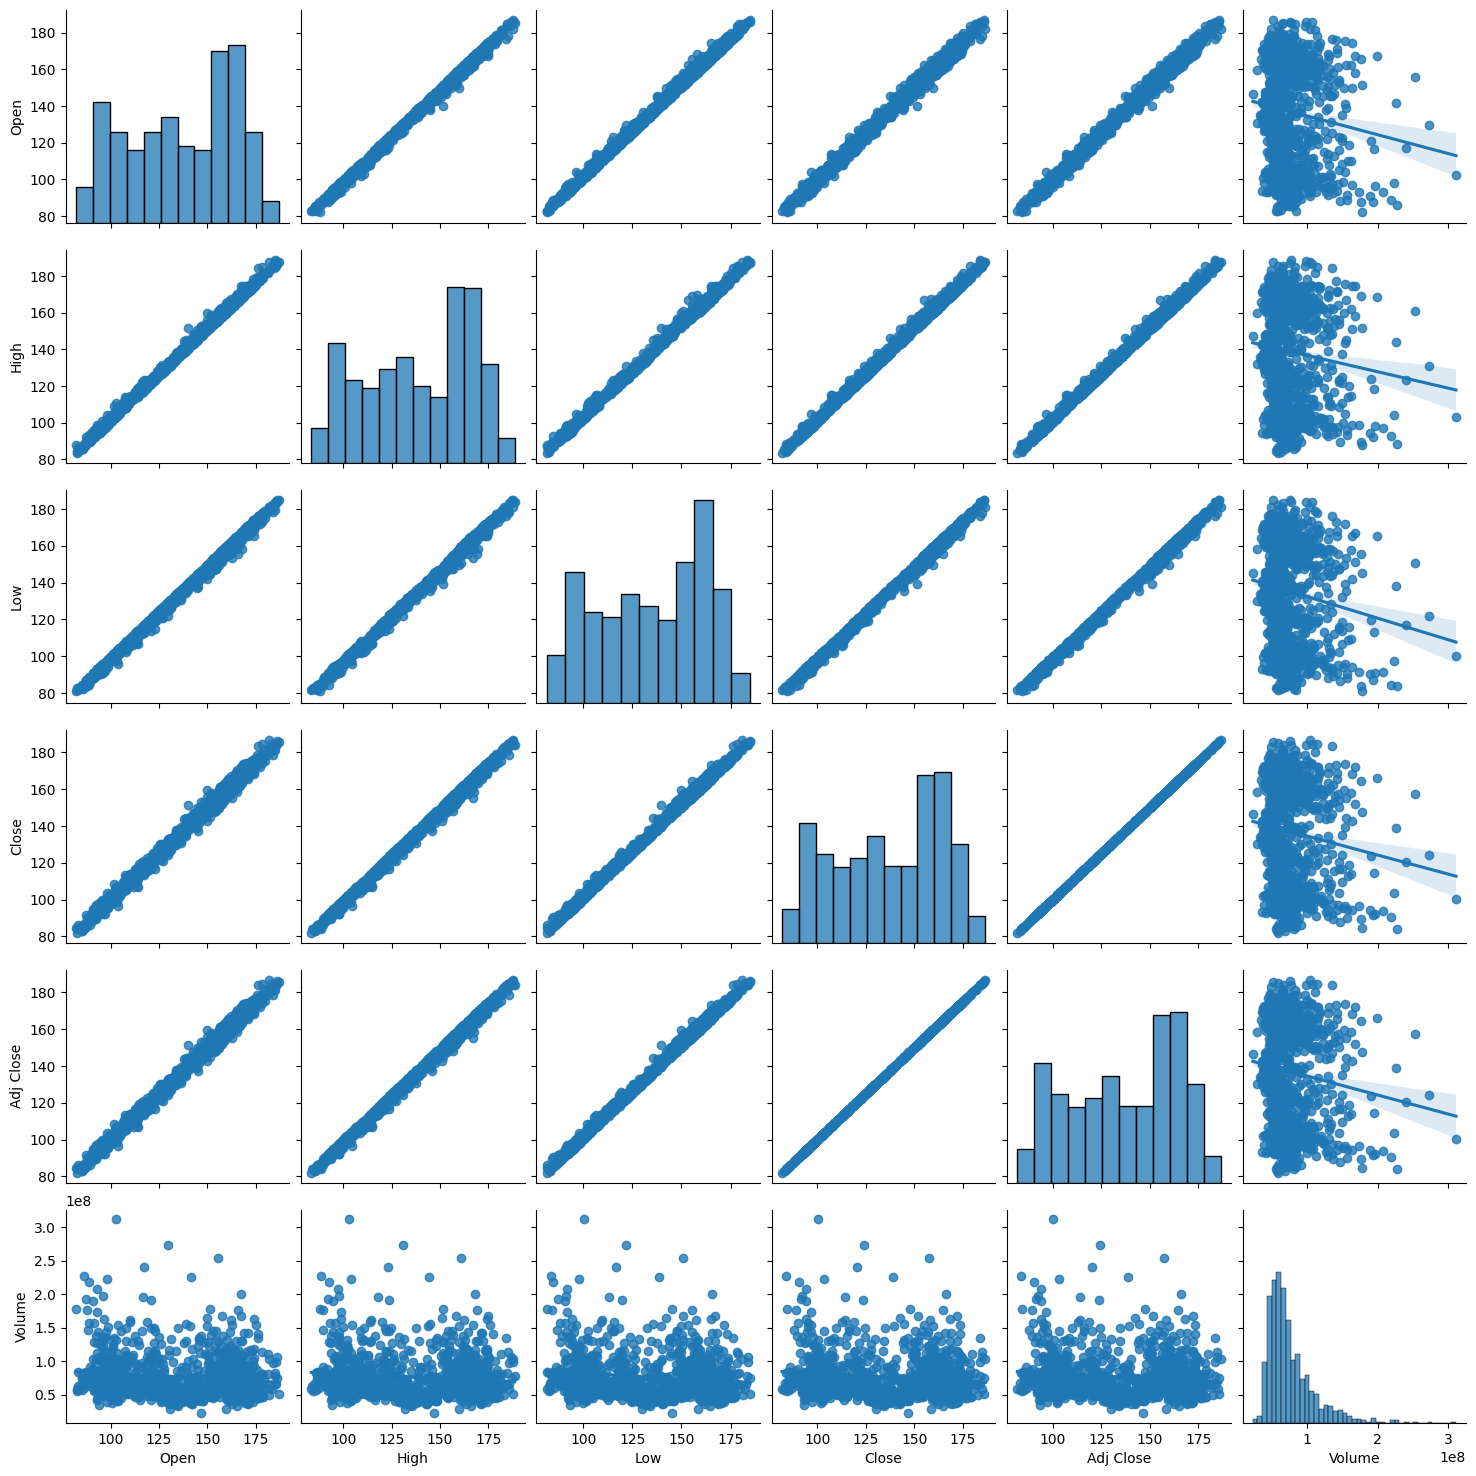

In [7]:
sns.pairplot(df, kind = 'reg')

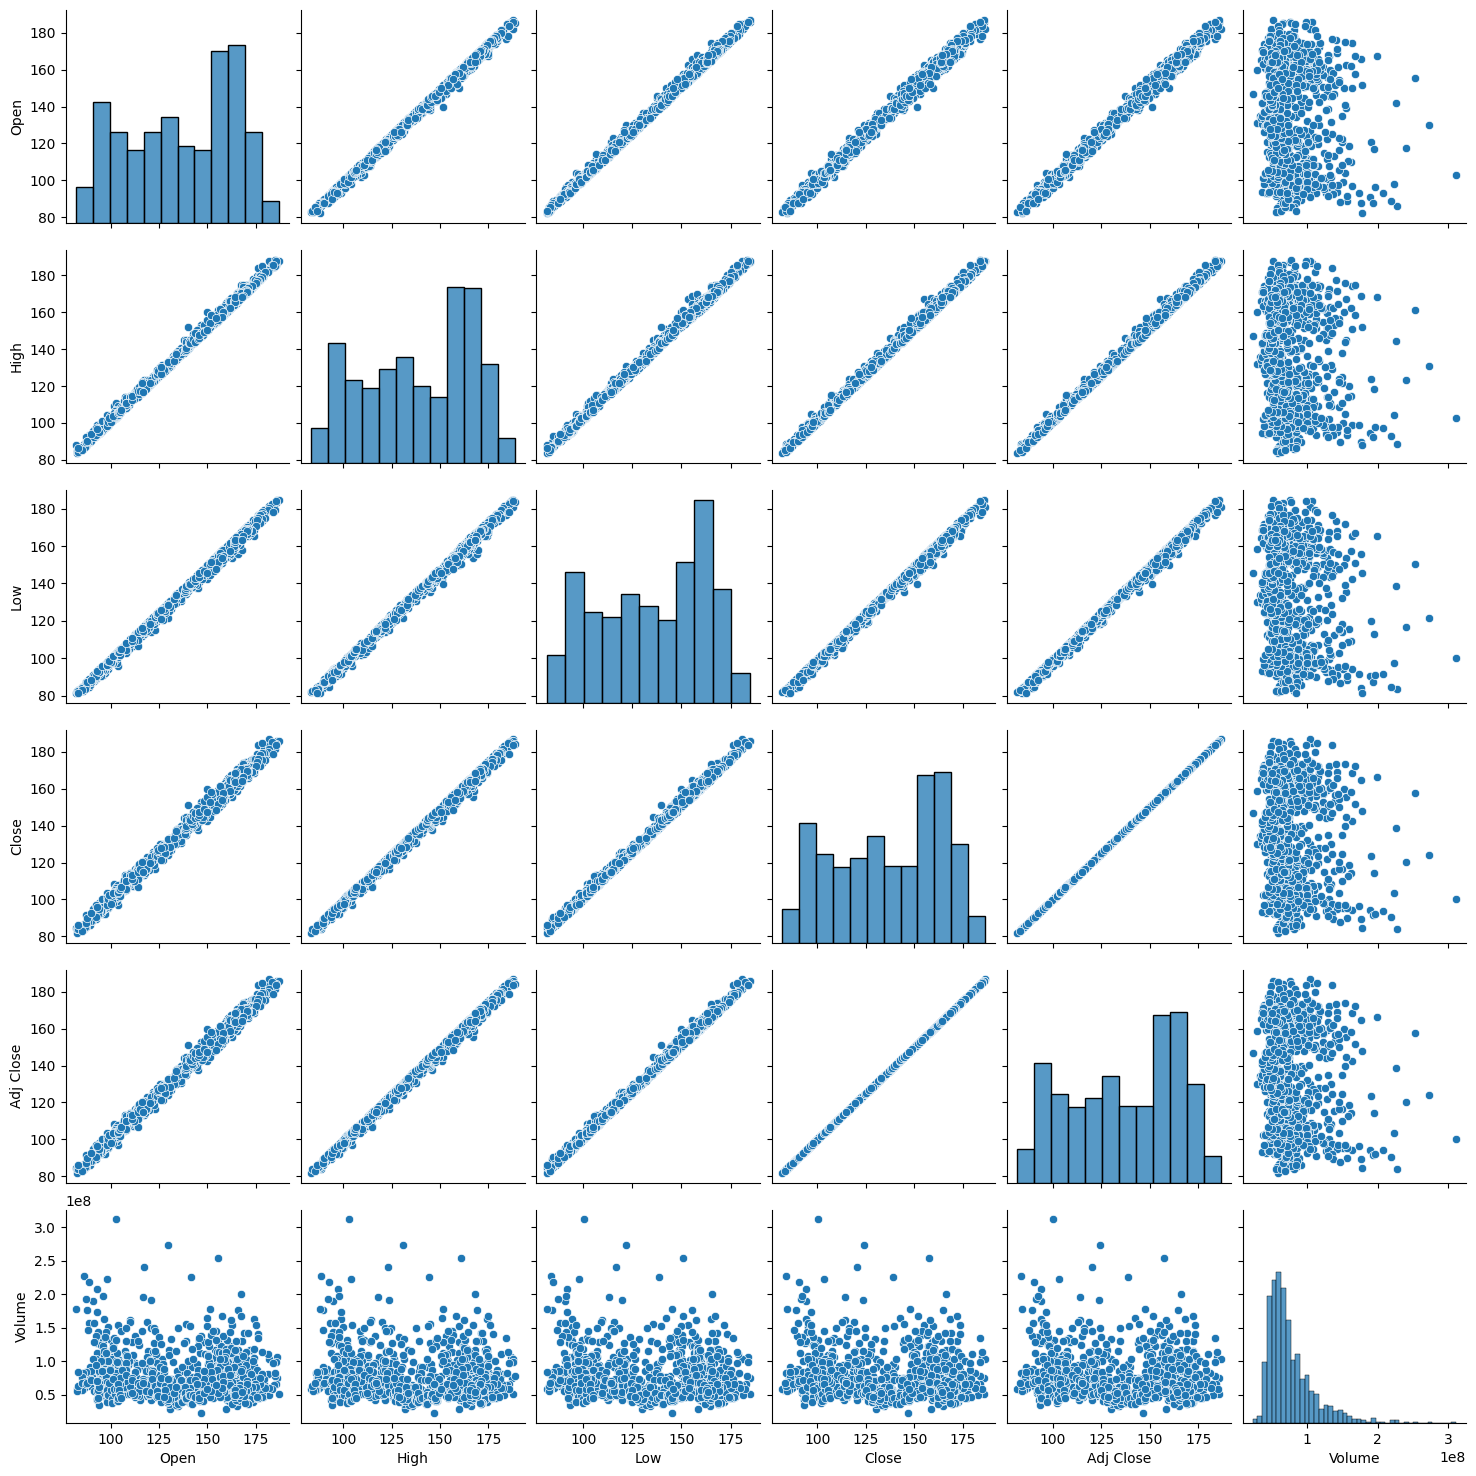

In [8]:
sns.pairplot(df)

In [9]:
import pandas as pd
import numpy as np

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...
2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000
2023-12-11,145.660004,146.190002,143.639999,145.889999,145.889999,50907300
2023-12-12,145.520004,147.500000,145.300003,147.479996,147.479996,44944300


In [11]:
lstm_rows = df["High"].values
len(lstm_rows)

996

In [12]:
lstm_training_lata_len = int(np.ceil(len(lstm_rows) * .95))
lstm_training_lata_len

947

In [13]:
#train
lstm_train_in_seq1 = df.iloc[0:int(lstm_training_lata_len),0:1].values #high
lstm_train_in_seq2 = df.iloc[0:int(lstm_training_lata_len),1:2].values #low
lstm_train_in_seq3 = df.iloc[0:int(lstm_training_lata_len),2:3].values #open
lstm_train_out_seq = df.iloc[0:int(lstm_training_lata_len),3:4].values #close
len(lstm_train_in_seq1)

947

In [14]:
#test
lstm_test_in_seq1 = df.iloc[lstm_training_lata_len -60: ,0:1].values #high
lstm_test_in_seq2 = df.iloc[lstm_training_lata_len -60:,1:2].values #low
lstm_test_in_seq3 = df.iloc[lstm_training_lata_len -60:,2:3].values #open
lstm_test_out_seq = df.iloc[lstm_training_lata_len -60:,3:4].values #close
len(lstm_test_in_seq1)

109

In [15]:
#train boyutlandırma
lstm_train_in_seq1 = lstm_train_in_seq1.reshape((len(lstm_train_in_seq1),1))
lstm_train_in_seq2 = lstm_train_in_seq2.reshape((len(lstm_train_in_seq1),1))
lstm_train_in_seq3 = lstm_train_in_seq3.reshape((len(lstm_train_in_seq1),1))
lstm_train_out_seq = lstm_train_out_seq.reshape((len(lstm_train_in_seq1),1))

In [16]:
#test boyutlandırma
lstm_test_in_seq1 = lstm_test_in_seq1.reshape((len(lstm_test_in_seq1),1))
lstm_test_in_seq2 = lstm_test_in_seq2.reshape((len(lstm_test_in_seq1),1))
lstm_test_in_seq3 = lstm_test_in_seq3.reshape((len(lstm_test_in_seq1),1))
lstm_test_out_seq = lstm_test_out_seq.reshape((len(lstm_test_in_seq1),1))

In [17]:
from numpy import hstack
from numpy import array

In [18]:
train_dataset = hstack((lstm_train_in_seq1,lstm_train_in_seq2,lstm_train_in_seq3,lstm_train_out_seq))
train_dataset

array([[ 93.75      ,  94.90049744,  93.20749664,  94.90049744],
       [ 93.22499847,  94.30999756,  93.22499847,  93.74849701],
       [ 93.        ,  95.18450165,  93.        ,  95.14399719],
       ...,
       [128.05999756, 128.52000427, 124.25      , 124.72000122],
       [126.05999756, 127.36000061, 125.68000031, 127.        ],
       [126.70999908, 126.73000336, 124.33000183, 125.95999908]])

In [19]:
df.iloc[int(lstm_training_lata_len-1):,:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-05,126.709999,126.730003,124.330002,125.959999,125.959999,39660600
2023-10-06,124.160004,128.449997,124.129997,127.959999,127.959999,46795900
2023-10-09,126.220001,128.789993,124.760002,128.259995,128.259995,38773700
2023-10-10,128.820007,130.740005,128.050003,129.479996,129.479996,42178600
2023-10-11,129.740005,132.050003,129.610001,131.830002,131.830002,40741800
2023-10-12,132.169998,134.479996,131.229996,132.330002,132.330002,55528600
2023-10-13,132.979996,133.309998,128.949997,129.789993,129.789993,45786600
2023-10-16,130.690002,133.070007,130.429993,132.550003,132.550003,42832900
2023-10-17,130.389999,132.580002,128.710007,131.470001,131.470001,49344600


In [20]:
test_dataset = hstack((lstm_test_in_seq1,lstm_test_in_seq2,lstm_test_in_seq3,lstm_test_out_seq))
test_dataset

array([[134.03999329, 134.66999817, 132.71000671, 134.30000305],
       [134.05999756, 136.6499939 , 134.05999756, 134.67999268],
       [134.55999756, 135.61999512, 133.21000671, 133.55999756],
       [132.71000671, 133.86000061, 131.3500061 , 132.83000183],
       [133.38999939, 135.99000549, 132.52999878, 135.36000061],
       [134.07000732, 134.78999329, 129.33000183, 129.96000671],
       [131.33999634, 131.36999512, 128.41999817, 130.        ],
       [130.30999756, 131.66000366, 128.3500061 , 128.80000305],
       [129.30999756, 129.58000183, 128.52999878, 129.13000488],
       [126.51000214, 129.08000183, 126.11000061, 128.1499939 ],
       [131.        , 132.63000488, 127.79000092, 128.25      ],
       [129.69000244, 133.00999451, 129.33000183, 132.21000671],
       [133.19999695, 133.86999512, 132.38000488, 133.67999268],
       [133.55000305, 133.69000244, 131.61999512, 131.69000244],
       [130.1499939 , 130.22999573, 126.81999969, 128.21000671],
       [127.48000336, 129

In [21]:
def veriyi_bol(veri, n_steps):
    X, y = list() , list()
    for i in range(len(veri)):
        end_ix = i + n_steps
        if end_ix > len(veri):
            break
        seq_x, seq_y = veri[i: end_ix, : -1], veri[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [22]:
n_steps = 5

In [23]:
X_train, y_train = veriyi_bol(train_dataset, n_steps)
X_train

array([[[ 93.75      ,  94.90049744,  93.20749664],
        [ 93.22499847,  94.30999756,  93.22499847],
        [ 93.        ,  95.18450165,  93.        ],
        [ 95.22499847,  95.69450378,  94.60199738],
        [ 94.90200043,  95.55000305,  94.3219986 ]],

       [[ 93.22499847,  94.30999756,  93.22499847],
        [ 93.        ,  95.18450165,  93.        ],
        [ 95.22499847,  95.69450378,  94.60199738],
        [ 94.90200043,  95.55000305,  94.3219986 ],
        [ 95.49449921,  95.89099884,  94.79000092]],

       [[ 93.        ,  95.18450165,  93.        ],
        [ 95.22499847,  95.69450378,  94.60199738],
        [ 94.90200043,  95.55000305,  94.3219986 ],
        [ 95.49449921,  95.89099884,  94.79000092],
        [ 95.26850128,  95.34700012,  94.        ]],

       ...,

       [[125.76000214, 127.48000336, 124.12999725],
        [124.04000092, 126.58000183, 123.04000092],
        [128.19999695, 129.1499939 , 126.31999969],
        [127.27999878, 130.47000122, 126.5400

In [24]:
y_train

array([ 94.59850311,  95.05249786,  94.15799713,  94.56500244,
        93.47200012,  93.10099792,  93.89700317,  93.23600006,
        94.59999847,  94.3730011 ,  94.22899628,  93.08200073,
        91.41699982,  92.66249847,  92.90000153,  93.53399658,
       100.43599701, 100.20999908, 102.48349762, 101.99349976,
       102.5114975 , 103.96399689, 106.69550323, 107.54000092,
       108.        , 107.49349976, 106.74349976, 107.78350067,
       108.51100159, 107.65499878, 104.79850006, 100.46450043,
        98.63700104,  98.97949982,  94.21499634,  94.1875    ,
        97.69750214,  95.44950104,  98.79149628,  96.20149994,
        95.05449677,  90.03050232,  94.59100342,  91.04299927,
        83.83049774,  89.25      ,  84.45749664,  90.39199829,
        91.5       ,  94.04650116,  92.30449677,  95.14150238,
        97.00499725,  94.29199982,  97.77449799,  95.00499725,
        98.19750214,  97.48600006,  95.38500214,  95.9414978 ,
        95.32949829,  99.87950134, 100.58000183, 102.15

In [25]:
X_test, y_test = veriyi_bol(test_dataset, n_steps)
X_test

array([[[134.03999329, 134.66999817, 132.71000671],
        [134.05999756, 136.6499939 , 134.05999756],
        [134.55999756, 135.61999512, 133.21000671],
        [132.71000671, 133.86000061, 131.3500061 ],
        [133.38999939, 135.99000549, 132.52999878]],

       [[134.05999756, 136.6499939 , 134.05999756],
        [134.55999756, 135.61999512, 133.21000671],
        [132.71000671, 133.86000061, 131.3500061 ],
        [133.38999939, 135.99000549, 132.52999878],
        [134.07000732, 134.78999329, 129.33000183]],

       [[134.55999756, 135.61999512, 133.21000671],
        [132.71000671, 133.86000061, 131.3500061 ],
        [133.38999939, 135.99000549, 132.52999878],
        [134.07000732, 134.78999329, 129.33000183],
        [131.33999634, 131.36999512, 128.41999817]],

       ...,

       [[147.58000183, 147.8500061 , 144.27999878],
        [146.1499939 , 147.91999817, 145.33999634],
        [145.47999573, 147.83999634, 145.3999939 ],
        [145.66000366, 146.19000244, 143.6399

In [26]:
#LSTM model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [27]:
X_train.shape

(943, 5, 3)

In [28]:
n_features = X_train.shape[2]
n_features

3

In [29]:
#model build
model = Sequential()
model.add(LSTM(256, return_sequences = True, activation = "relu", input_shape=(n_steps, n_features) ))
model.add(LSTM(128, return_sequences = False))
model.add(Dense(1))
model.summary()
model.compile(optimizer="adam", loss="mse")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 256)            266240    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 463489 (1.77 MB)
Trainable params: 463489 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, epochs = 500, batch_size = 64, verbose = 1, validation_data = (X_test, y_test) )

Epoch 1/500
15/15 [==============================] - 6s 74ms/step - loss: 18579.4258 - val_loss: 16859.6914
Epoch 2/500
15/15 [==============================] - 0s 21ms/step - loss: 17487.5078 - val_loss: 16175.8311
Epoch 3/500
15/15 [==============================] - 0s 22ms/step - loss: 16910.1934 - val_loss: 15580.4170
Epoch 4/500
15/15 [==============================] - 0s 20ms/step - loss: 16286.0586 - val_loss: 15069.8838
Epoch 5/500
15/15 [==============================] - 0s 21ms/step - loss: 15864.0137 - val_loss: 14660.3457
Epoch 6/500
15/15 [==============================] - 0s 21ms/step - loss: 15421.5605 - val_loss: 14242.0957
Epoch 7/500
15/15 [==============================] - 0s 21ms/step - loss: 15017.2637 - val_loss: 13832.2217
Epoch 8/500
15/15 [==============================] - 0s 14ms/step - loss: 14620.4902 - val_loss: 13465.8789
Epoch 9/500
15/15 [==============================] - 0s 12ms/step - loss: 14258.7461 - val_loss: 13114.6191
Epoch 10/500
15/15 [========

In [31]:
X_test.shape

(105, 5, 3)

In [32]:
yhat = model.predict(X_test, verbose=0)
yhat

array([[135.34853 ],
       [135.33057 ],
       [135.60327 ],
       [134.30548 ],
       [134.59923 ],
       [134.0723  ],
       [133.04283 ],
       [132.06012 ],
       [131.57324 ],
       [125.27245 ],
       [132.11913 ],
       [131.0177  ],
       [134.91682 ],
       [134.92181 ],
       [131.83832 ],
       [126.1683  ],
       [140.10268 ],
       [140.36038 ],
       [140.31674 ],
       [139.24995 ],
       [138.56387 ],
       [137.54309 ],
       [138.01108 ],
       [139.11742 ],
       [137.33777 ],
       [136.11757 ],
       [133.3485  ],
       [135.05884 ],
       [136.06248 ],
       [135.49734 ],
       [135.79106 ],
       [133.90637 ],
       [135.07307 ],
       [135.01031 ],
       [136.02638 ],
       [135.70427 ],
       [138.8358  ],
       [137.80602 ],
       [136.6443  ],
       [134.59056 ],
       [137.25516 ],
       [137.67119 ],
       [143.20676 ],
       [139.76337 ],
       [147.74957 ],
       [143.7331  ],
       [140.1233  ],
       [138.0

In [33]:
print(len(yhat))

105


In [34]:
lstm_rmse = np.sqrt(np.mean(((yhat - y_test) **2)))
lstm_rmse

10.25536234723471

In [35]:
lstm_train = df.iloc[0:int(lstm_training_lata_len),:]
lstm_valid = df.iloc[lstm_training_lata_len -56: ,:]
lstm_valid["Predictions"] = yhat

<ipython-input-35-9ffb03c9ba84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_valid["Predictions"] = yhat


In [36]:
lstm_train.head(n=2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000


In [37]:
lstm_train.tail(n=2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-04,126.059998,127.360001,125.680000,127.000000,127.000000,44203900
2023-10-05,126.709999,126.730003,124.330002,125.959999,125.959999,39660600


In [38]:
lstm_valid.head(n=2)

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2023-07-19,133.389999,135.990005,132.529999,135.360001,135.360001,54531000,135.348526
2023-07-20,134.070007,134.789993,129.330002,129.960007,129.960007,59820600,135.330566


In [39]:
lstm_valid.tail(n=2)

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2023-12-13,148.119995,149.460007,146.820007,148.839996,148.839996,52766200,149.135696
2023-12-14,149.929993,150.539993,145.520004,147.419998,147.419998,58341200,148.344940


In [40]:
import matplotlib.pyplot as plt

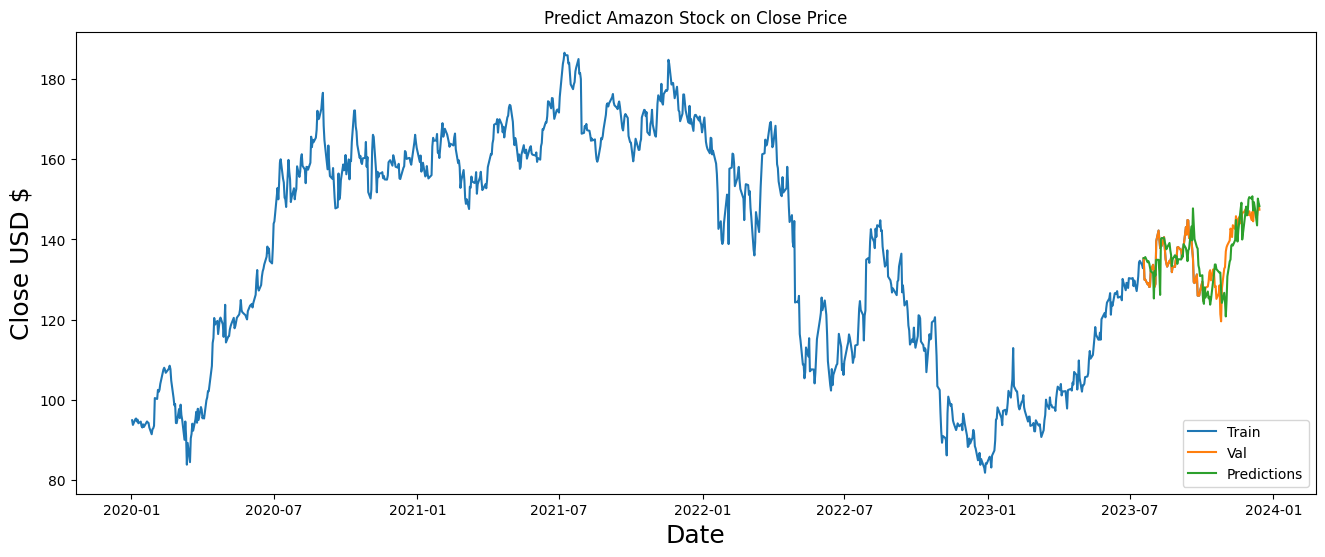

In [41]:
plt.figure(figsize= (16,6))
plt.title('Predict Amazon Stock on Close Price')
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close USD $", fontsize = 18)
plt.plot(lstm_train["Close"])
plt.plot(lstm_valid[["Close" , "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [42]:
import plotly.graph_objects as go

# Plot training data
trace_train = go.Scatter(x=lstm_train.index, y=lstm_train['Close'], mode='lines', name='Train')

# Plot validation data and predictions
trace_valid = go.Scatter(x=lstm_valid.index, y=lstm_valid['Close'], mode='lines', name='Validation')
trace_predictions = go.Scatter(x=lstm_valid.index, y=lstm_valid['Predictions'], mode='lines', name='Predictions')

# Create layout
layout = go.Layout(
    title='Predict Amazon Stock on Close Price',
    xaxis=dict(title='Date', tickmode='auto'),
    yaxis=dict(title='Close USD $', tickmode='auto'),
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
    autosize=False,
    width=1200,
    height=500,
)

# Create figure
fig = go.Figure(data=[trace_train, trace_valid, trace_predictions], layout=layout)

# Show the figure
fig.show()

In [43]:
import plotly.graph_objects as go

# Plot training data
trace_train = go.Scatter(x=lstm_train.index, y=lstm_train['Close'], mode='lines', name='Train')

# Plot validation data and predictions
trace_valid = go.Scatter(x=lstm_valid.index, y=lstm_valid['Close'], mode='lines', name='Validation')

# Extend the date range for the prediction line
extended_date_range = pd.date_range(start=lstm_valid.index.min(), end='2024-12-31')
trace_predictions = go.Scatter(x=extended_date_range, y=lstm_valid['Predictions'], mode='lines', name='Predictions')

# Create layout
layout = go.Layout(
    title='Predict Amazon Stock on Close Price',
    xaxis=dict(title='Date', tickmode='auto'),
    yaxis=dict(title='Close USD $', tickmode='auto'),
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
    autosize=False,
    width=1200,
    height=500,
)

# Create figure
fig = go.Figure(data=[trace_train, trace_valid, trace_predictions], layout=layout)

# Show the figure
fig.show()

# **###############################################**

In [44]:
import math
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from sklearn import preprocessing

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [46]:
start = datetime.datetime(2020, 1, 2)
end = datetime.datetime(2023, 12, 31)

In [47]:
# Fetch stock data from Yahoo Finance
df = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [48]:
df.tail(n=2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-13,148.119995,149.460007,146.820007,148.839996,148.839996,52766200
2023-12-14,149.929993,150.539993,145.520004,147.419998,147.419998,58341200


In [49]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail()

Date
2023-12-08    135.778401
2023-12-11    135.937701
2023-12-12    136.112501
2023-12-13    136.312901
2023-12-14    136.495801
Name: Adj Close, dtype: float64

In [50]:
# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [51]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

'3.7.1'

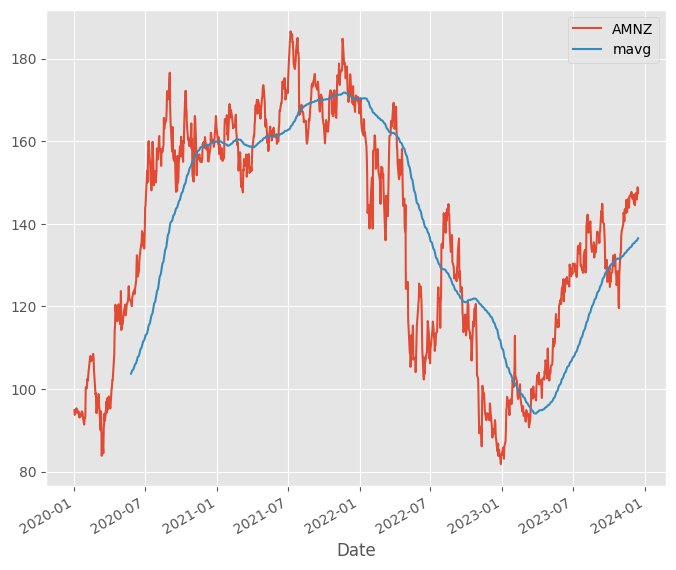

In [52]:
# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AMNZ')
mavg.plot(label='mavg')
plt.legend()

<Axes: xlabel='Date'>

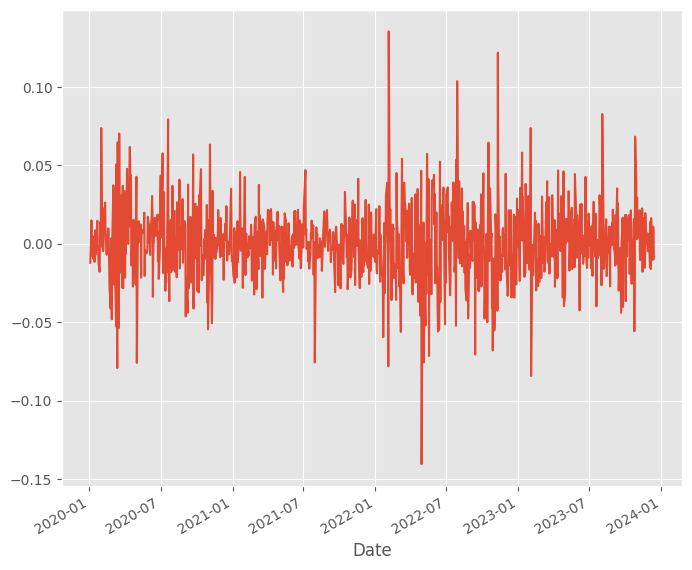

In [53]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [54]:
dfcomp = yf.download(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT', 'TSLA'],start=start,end=end)['Adj Close']
dfcomp.tail()

[*********************100%%**********************]  6 of 6 completed


,AAPL,AMZN,GOOG,IBM,MSFT,TSLA
Date,,,,,,
2023-12-08,195.710007,147.419998,136.639999,161.960007,374.230011,243.839996
2023-12-11,193.179993,145.889999,134.699997,163.509995,371.299988,239.740005
2023-12-12,194.710007,147.479996,133.639999,164.710007,374.380005,237.009995
2023-12-13,197.960007,148.839996,133.970001,163.619995,374.369995,239.289993
2023-12-14,198.110001,147.419998,133.199997,162.910004,365.929993,251.050003


In [55]:
retscomp = dfcomp.pct_change()
retscomp.tail()

,AAPL,AMZN,GOOG,IBM,MSFT,TSLA
Date,,,,,,
2023-12-08,0.007412,0.003676,-0.013073,0.010860,0.008842,0.004946
2023-12-11,-0.012927,-0.010379,-0.014198,0.009570,-0.007829,-0.016814
2023-12-12,0.007920,0.010899,-0.007869,0.007339,0.008295,-0.011387
2023-12-13,0.016691,0.009222,0.002469,-0.006618,-0.000027,0.009620
2023-12-14,0.000758,-0.009540,-0.005748,-0.004339,-0.022545,0.049145


In [56]:
corr = retscomp.corr()
corr.tail()

,AAPL,AMZN,GOOG,IBM,MSFT,TSLA
AMZN,0.625488,1.000000,0.669589,0.262142,0.679197,0.454532
GOOG,0.691188,0.669589,1.000000,0.399033,0.769925,0.430008
IBM,0.436623,0.262142,0.399033,1.000000,0.432043,0.193664
MSFT,0.777625,0.679197,0.769925,0.432043,1.000000,0.472505
TSLA,0.510973,0.454532,0.430008,0.193664,0.472505,1.000000


Text(0, 0.5, 'Returns TSLA')

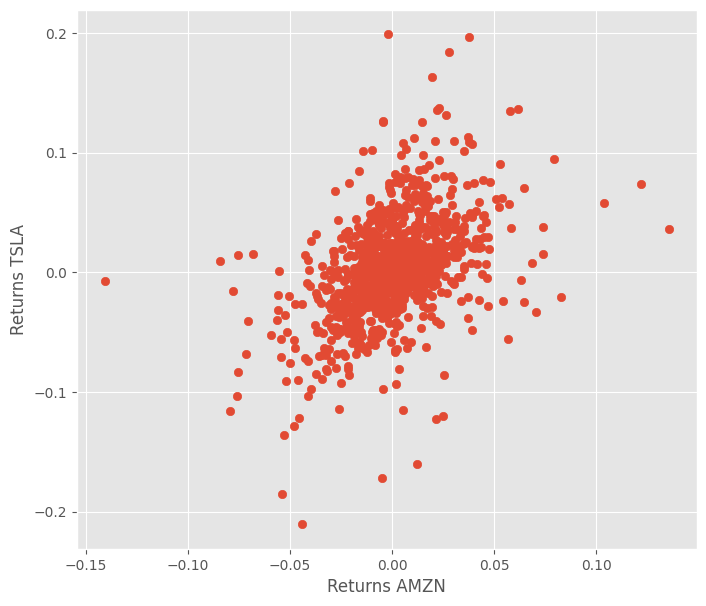

In [57]:
plt.scatter(retscomp.AMZN, retscomp.TSLA)
plt.xlabel('Returns AMZN')
plt.ylabel('Returns TSLA')

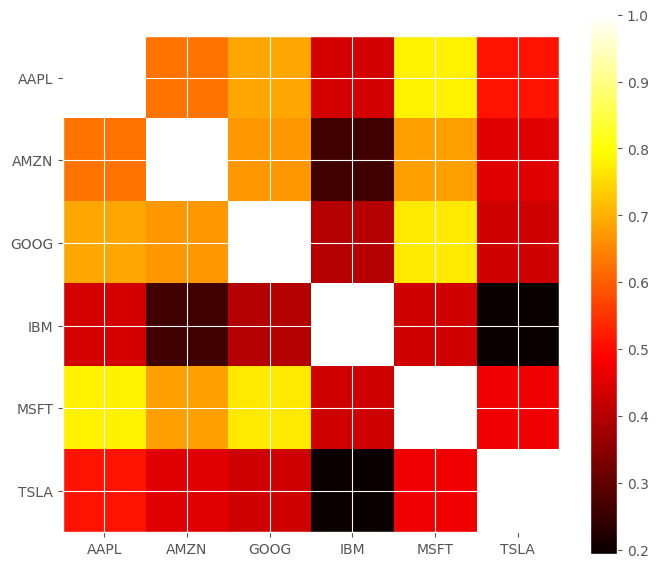

In [58]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

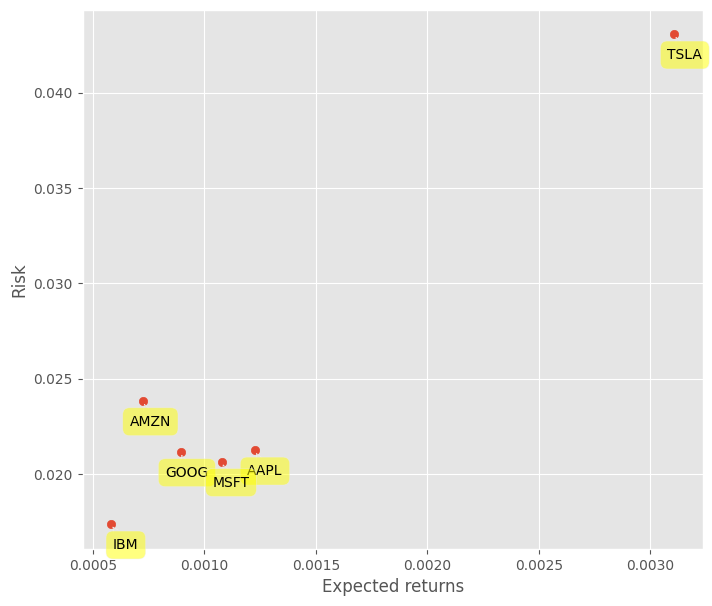

In [59]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
  plt.annotate(
    label,
    xy = (x, y), xytext = (20, -20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Now you could view this neat chart of risk and return comparisons for competing stocks. Logically, you would like to minimize the risk and maximize returns. Therefore, you would want to draw the line for your risk-return tolerance (The red line). You would then create the rules to buy those stocks under the red line (MSFT, GE, and IBM) and sell those stocks above the red line (AAPL and GOOG). This red line showcases your expected value threshold and your baseline for buy/sell decision.

In [60]:
# Predicting Stocks Price

dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2023-12-08,147.419998,41858000,1.655137,1.333518
2023-12-11,145.889999,50907300,1.747894,0.157899
2023-12-12,147.479996,44944300,1.491726,1.346888
2023-12-13,148.839996,52766200,1.773716,0.486093
2023-12-14,147.419998,58341200,3.405229,-1.674111


In [61]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [62]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [63]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<ipython-input-63-0c13d41461e6>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [64]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [65]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [66]:
# prints confidence scores for each algorithm:

print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.888251084485889
The quadratic regression 2 confidence is  0.8901818159073566
The quadratic regression 3 confidence is  0.8886513853123094
The knn regression confidence is  0.8265417059080802


In [67]:
forecast_set = clfknn.predict(X_lately)

last_date = datetime.date(2023, 12, 31)
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)
print(last_date)
print(next_unix)

2023-12-31
2024-01-01


The confidence score is  0.888251084485889


<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library beh

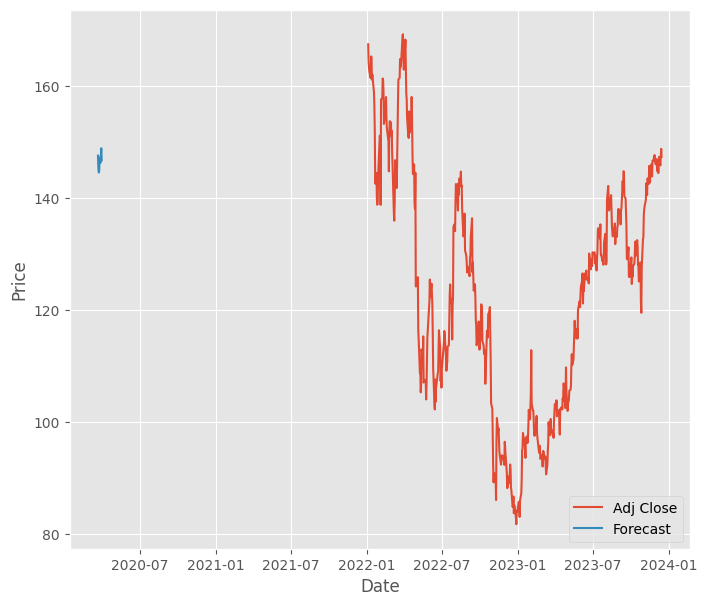

The confidence score is  0.8901818159073566


<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library beh

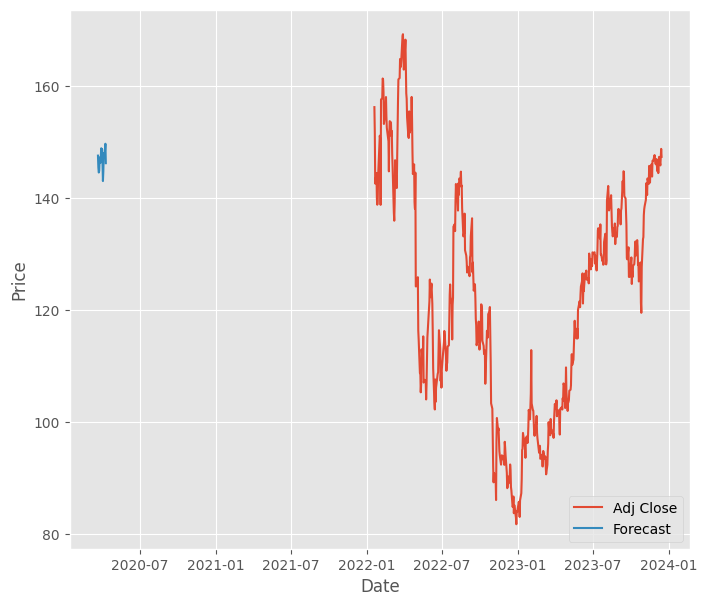

The confidence score is  0.8886513853123094


<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library beh

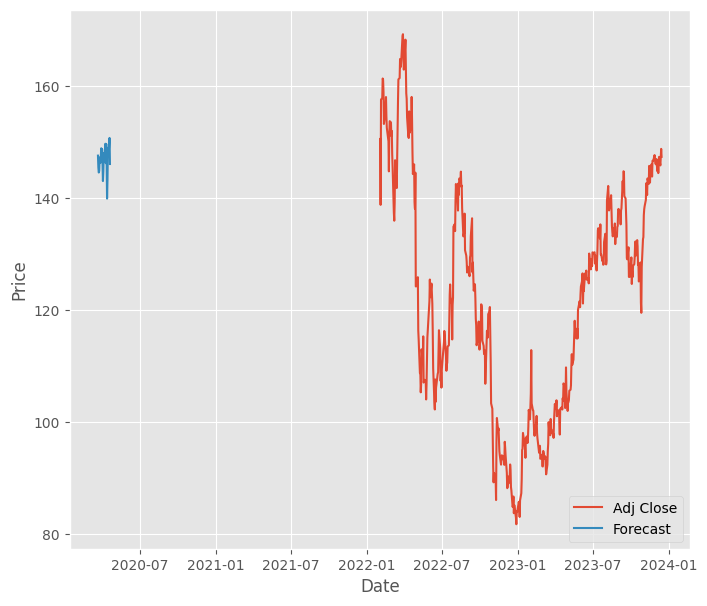

The confidence score is  0.8265417059080802


<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-68-912cf9d203c8>:18: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library beh

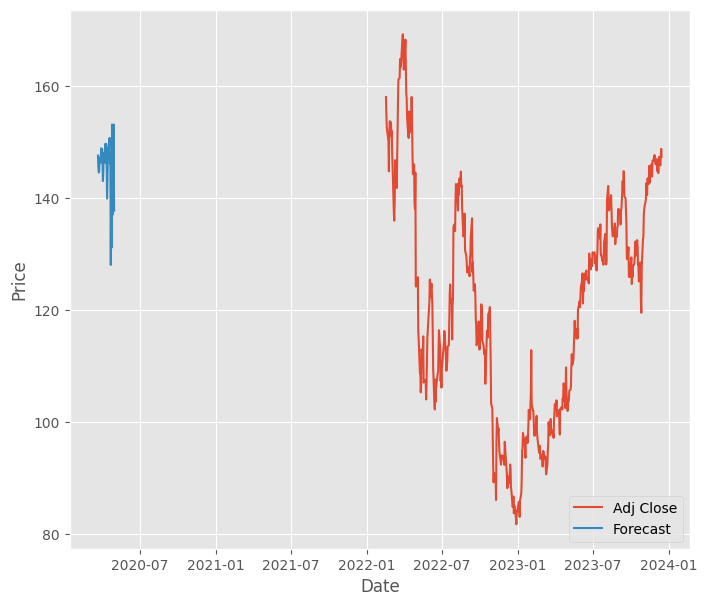

In [68]:
#Displays forecast in tables for 3 models

algorithms = [clfreg, clfpoly2, clfpoly3, clfknn]

dfreg['Forecast'] = np.nan

last_date = datetime.date(2020, 3, 21)
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for x in algorithms:
  forecast_set = x.predict(X_lately)
  print('The confidence score is ', x.score(X_test,y_test))

  for i in forecast_set:
      next_date = next_unix
      next_unix += datetime.timedelta(days=1)
      dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
  dfreg['Adj Close'].tail(500).plot()
  dfreg['Forecast'].tail(500).plot()
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()